# Stacked Bar Plot for Metabolites:

**Updated on:** 2023-03-07 18:06 CET

In this Jupyter Notebook we use the ASV tables (16S, 18SV9) obtained for CCE data to get stacked bar plot in different taxonomic level.

**Authors**: Abzer Kelminal (abzer.shah@uni-tuebingen.de) <br>
**Input file format**: .csv files <br>
**Outputs**: .csv files, .svg images  <br>
**Dependencies**: tidyverse, dplyr

---
**Necessary input files**:
1. Feature table from MZMine3 output combined with SIRIUS and CANOPUS information
2. Feature table after data-cleanup combined with SIRIUS and CANOPUS information
3. Metadata table describing the filenames in feature table
---

# 1. Setting working directory and loading libraries:

In [1]:
if (!require("tidyverse")) install.packages("tidyverse")
if (!require("highcharter")) install.packages("highcharter")

Loading required package: tidyverse

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.0     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.1     v tibble    3.1.8
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: highcharter

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
#loading libraries
library(tidyverse)
library(highcharter)

In [6]:
setwd('D:/Projects/cce github/Outputs/VK_Plots/StackedBarPlot_Metabolites')

In [7]:
print(list.files("."))

[1] "221013_MZmine_Quant_Table_Normalised_SIRIUS_canopus.csv"
[2] "221013_MZmine_Quant_Table_NotCleaned_SIRIUS_canopus.csv"
[3] "metadata_CCE.csv"                                       


<font color = "red">**NOTE: Repeat the notebook with '221013_MZmine_Quant_Table_Normalised_SIRIUS_canopus.csv' to get the stacked plot for normalised data.**</font>

In [9]:
#-------Loading input data:
FeatureTable <- read.csv('221013_MZmine_Quant_Table_NotCleaned_SIRIUS_canopus.csv',check.names = T,header=T,row.names = 1)
Metadata <- read.csv('metadata_CCE.csv',check.names=F,header=T,row.names=1)

In [10]:
head(FeatureTable)
dim(FeatureTable)

,Row_ID,row.m.z,row.retention.time,row.ion.mobility,row.ion.mobility.unit,row.CCS,correlation.group.ID,annotation.network.number,best.ion,auto.MS2.verify,...,P_Canopus,F_Canopus,Cl_Canopus,B_Canopus,Br_Canopus,I_Canopus,C_N,O_C,H_C,avCox
,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<int>,<int>,<chr>,<lgl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,161.0822,0.1014927,NA,NA,NA,NA,NA,,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,5,182.9850,0.1143781,NA,NA,NA,NA,NA,,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,7,391.2842,0.1714902,NA,NA,NA,NA,NA,,NA,...,0,0,0,0,0,0,Inf,0.1666667,1.583333,-1.25
4,8,181.0494,0.2058556,NA,NA,NA,NA,NA,,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,15,177.0909,0.4108315,NA,NA,NA,NA,NA,,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,16,223.0965,0.4668853,NA,NA,NA,NA,NA,,NA,...,0,0,0,0,0,0,Inf,0.3333333,1.166667,-0.50


[1] 10645   377

Note that the no.of features before data cleanup is 10,645 (which is the number of rows). This will be found reduced in the normalised feature table.

In [11]:
head(Metadata)
dim(Metadata)

,ATTRIBUTE_x,ATTRIBUTE_y,ATTRIBUTE_z,ATTRIBUTE_Spot_size,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Sample_Number,ATTRIBUTE_Date,ATTRIBUTE_Cast,ATTRIBUTE_Event_Number,ATTRIBUTE_Bottle,...,ATTRIBUTE_O2_Saturation__per_,ATTRIBUTE_O2_saturation_binned,ATTRIBUTE_PO4,ATTRIBUTE_NO2,ATTRIBUTE_NO3,ATTRIBUTE_NH4,ATTRIBUTE_PO4_binned,ATTRIBUTE_NO2_binned,ATTRIBUTE_NO3_binned,ATTRIBUTE_NH4_binned
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Blank_CCE_P1706_1.mzxml,0.0,0.0,0.0,1,Blank,1,20170602,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Blank_CCE_P1706_2.mzxml,0.0,0.0,0.0,1,Blank,2,20170602,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CCE_P1706_3.mzxml,-80.1,85.1,101.5,1,Control,3,20170602,2,NA,2,...,NA,NA,3.631,1.851,12.690,0.498,3.6,1.9,13,0.5
CCE_P1706_4.mzxml,-80.1,85.1,101.5,1,Control,4,20170602,2,NA,2,...,NA,NA,3.631,1.851,12.690,0.498,3.6,1.9,13,0.5
CCE_P1706_5.mzxml,-80.1,85.1,102.5,1,Control,5,20170602,2,NA,4,...,NA,NA,3.360,0.344,19.899,0.022,3.4,0.3,20,0.0
CCE_P1706_6.mzxml,-80.1,85.1,102.5,1,Control,6,20170602,2,NA,4,...,NA,NA,3.360,0.344,19.899,0.022,3.4,0.3,20,0.0


[1] 230  32

Removing the transect samples, Santa_Barbara basin samples, and the blank samples.

In [12]:
#-----Subsetting md:
md <-  Metadata %>% filter(ATTRIBUTE_Filament_Possition != 'Blank',
                           ATTRIBUTE_Location!='Santa_Barbara_Basin',
                           ATTRIBUTE_Location!='Transcet_1',
                           ATTRIBUTE_Location!='Transcet_2',
                           ATTRIBUTE_Location!='Transect_3')

#Picking only the 4 columns of interest from our metadata
md <- md[,c("ATTRIBUTE_Filament_Possition","ATTRIBUTE_Depth","ATTRIBUTE_Depth_Range","ATTRIBUTE_Location" )] 

<font color="red"> In the cell below, change the depth to your preference for getting deep & surface samples. Uncomment the respective cell for further analysis </font>

Surface samples:

In [13]:
#md <- md %>% filter(ATTRIBUTE_Depth < 15) 

Deep samples:

In [14]:
#md <- md %>% filter(ATTRIBUTE_Depth > 15, ATTRIBUTE_Depth <= 100) 

# 2. Arranging the feature table and metadata in the right format

In [15]:
ft <- FeatureTable
colnames(ft) <- gsub('_MSMS.mzXML.Peak.area','.mzxml',colnames(ft))  #substituting the file extension in the colnames of ft with mzxml

#Taking row ID, m/z value and RZ as the rownames of ft
rownames(ft) <- paste(paste0("X",ft$'Row_ID'), 
                      round(ft$'row.m.z',digits = 3),
                      round(ft$'row.retention.time',
                            digits = 3), sep = '_') 

ft <- ft[,-1:-3] #remove the first 3 cols which are the ID,m/z, RT

ft_CCE <- ft %>% select(contains('CCE')) #lets select only the CCE data
ft_CCE <- ft_CCE[,colnames(ft_CCE) %in% rownames(md)] #picking only the columns in ft_CCE as that of md rows

ft_CCE <- ft_CCE[,match(rownames(md),colnames(ft_CCE))] # make the columns in ft in the same order of md rownames
identical(colnames(ft_CCE),rownames(md)) #should return TRUE

[1] TRUE

In [16]:
head(ft,3)

,row.ion.mobility,row.ion.mobility.unit,row.CCS,correlation.group.ID,annotation.network.number,best.ion,auto.MS2.verify,identified.by.n.,partners,neutral.M.mass,...,P_Canopus,F_Canopus,Cl_Canopus,B_Canopus,Br_Canopus,I_Canopus,C_N,O_C,H_C,avCox
,<lgl>,<lgl>,<lgl>,<int>,<int>,<chr>,<lgl>,<int>,<chr>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X3_161.082_0.101,NA,NA,NA,NA,NA,,NA,NA,,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
X5_182.985_0.114,NA,NA,NA,NA,NA,,NA,NA,,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
X7_391.284_0.171,NA,NA,NA,NA,NA,,NA,NA,,NA,...,0,0,0,0,0,0,Inf,0.1666667,1.583333,-1.25


In [17]:
colnames(ft)

[1] "row.ion.mobility"                          
  [2] "row.ion.mobility.unit"                     
  [3] "row.CCS"                                   
  [4] "correlation.group.ID"                      
  [5] "annotation.network.number"                 
  [6] "best.ion"                                  
  [7] "auto.MS2.verify"                           
  [8] "identified.by.n."                          
  [9] "partners"                                  
 [10] "neutral.M.mass"                            
 [11] "CCE_P1706_2.mzxml"                         
 [12] "CCE_P1706_1.mzxml"                         
 [13] "CCE_P1706_4.mzxml"                         
 [14] "CCE_P1706_15.mzxml"                        
 [15] "CCE_P1706_8.mzxml"                         
 [16] "CCE_P1706_3.mzxml"                         
 [17] "CCE_P1706_9.mzxml"                         
 [18] "CCE_P1706_17.mzxml"                        
 [19] "CCE_P1706_5.mzxml"                         
 [20] "CCE_P1706_7.mzxml"                         
 [21] "CCE_P1706_16.mzxml"                        
 [22] "CCE_P1706_12.mzxml"                        
 [23] "CCE_P1706_20.mzxml"                        
 [24] "CCE_P1706_19.mzxml"                        
 [25] "CCE_P1706_11.mzxml"                        
 [26] "CCE_P1706_18.mzxml"                        
 [27] "CCE_P1706_13.mzxml"                        
 [28] "CCE_P1706_6.mzxml"                         
 [29] "CCE_P1706_24.mzxml"                        
 [30] "CCE_P1706_14.mzxml"                        
 [31] "CCE_P1706_10.mzxml"                        
 [32] "Brandon_Deep_DOM.mzxml"                    
 [33] "CCE_P1706_21.mzxml"                        
 [34] "CCE_P1706_22.mzxml"                        
 [35] "CCE_P1706_27.mzxml"                        
 [36] "CCE_P1706_33.mzxml"                        
 [37] "CCE_P1706_23.mzxml"                        
 [38] "CCE_P1706_29.mzxml"                        
 [39] "CCE_P1706_34.mzxml"                        
 [40] "CCE_P1706_32.mzxml"                        
 [41] "CCE_P1706_28.mzxml"                        
 [42] "CCE_P1706_39.mzxml"                        
 [43] "CCE_P1706_40.mzxml"                        
 [44] "CCE_P1706_31.mzxml"                        
 [45] "CCE_P1706_36.mzxml"                        
 [46] "CCE_P1706_38.mzxml"                        
 [47] "CCE_P1706_42.mzxml"                        
 [48] "CCE_P1706_30.mzxml"                        
 [49] "CCE_P1706_43.mzxml"                        
 [50] "CCE_P1706_25.mzxml"                        
 [51] "CCE_P1706_35.mzxml"                        
 [52] "CCE_P1706_44.mzxml"                        
 [53] "CCE_P1706_26.mzxml"                        
 [54] "CCE_P1706_51.mzxml"                        
 [55] "CCE_P1706_41.mzxml"                        
 [56] "CCE_P1706_37.mzxml"                        
 [57] "CCE_P1706_45.mzxml"                        
 [58] "CCE_P1706_52.mzxml"                        
 [59] "CCE_P1706_55.mzxml"                        
 [60] "CCE_P1706_54.mzxml"                        
 [61] "CCE_P1706_46.mzxml"                        
 [62] "CCE_P1706_56.mzxml"                        
 [63] "CCE_P1706_47.mzxml"                        
 [64] "CCE_P1706_53.mzxml"                        
 [65] "CCE_P1706_64.mzxml"                        
 [66] "CCE_P1706_58.mzxml"                        
 [67] "CCE_P1706_67.mzxml"                        
 [68] "CCE_P1706_77.mzxml"                        
 [69] "CCE_P1706_57.mzxml"                        
 [70] "CCE_P1706_63.mzxml"                        
 [71] "CCE_P1706_59.mzxml"                        
 [72] "CCE_P1706_69.mzxml"                        
 [73] "CCE_P1706_62.mzxml"                        
 [74] "CCE_P1706_71.mzxml"                        
 [75] "CCE_P1706_76.mzxml"                        
 [76] "CCE_P1706_66.mzxml"                        
 [77] "CCE_P1706_49.mzxml"                        
 [78] "CCE_P1706_68.mzxml"                        
 [79] "CCE_P1706_97.mzxm

---
Here, the file "CCE_P1706_284.mzxml" is the last CCE file in the ft table. To find the number of the next column: 

In [89]:
start <- which(colnames(ft)=="CCE_P1706_284.mzxml")+1 # This defines the column after the last CCE file
end <- ncol(ft)

In [90]:
info_ft <- ft[,start:end] #cols other than CCE data: CANOPUS and SIRIUS information
info_ft <- info_ft[,colSums(is.na(info_ft))<nrow(info_ft)] #removing if any NA columns present in the ft file
head(info_ft)

,Canopus_molecularFormula,adduct.x,NPC.pathway,NPC.pathway.Probability,NPC.superclass,NPC.superclass.Probability,NPC.class,NPC.class.Probability,ClassyFire.most.specific.class,ClassyFire.most.specific.class.Probability,...,P_Canopus,F_Canopus,Cl_Canopus,B_Canopus,Br_Canopus,I_Canopus,C_N,O_C,H_C,avCox
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X3_161.082_0.101,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
X5_182.985_0.114,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
X7_391.284_0.171,C24H38O4,[M + H]+,Shikimates and Phenylpropanoids,0.9586233,Phenolic acids (C6-C1),0.9618512,Simple phenolic acids,0.9163092,Benzoic acid esters,0.9953157,...,0,0,0,0,0,0,Inf,0.1666667,1.583333,-1.25
X8_181.049_0.206,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
X15_177.091_0.411,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
X16_223.096_0.467,C12H16O5,[M - H2O + H]+,Fatty acids,0.5184101,Cyclic polyketides,0.3802861,Dicarboxylic acids,0.3870150,Branched fatty acids,0.8509274,...,0,0,0,0,0,0,Inf,0.3333333,1.166667,-0.50


The above dataframe "info_ft" is the information obtained from SIRIUS and CANOPUS file. It was obtained using the **"Elemental_composition.ipynb"** and merged with the feature table (which is obtained as a result of MZmine).

In [19]:
final_ft <- merge(ft_CCE, info_ft, by='row.names', all=T) #mergeing both by row names
rownames(final_ft) <- final_ft[,1] #merging by row names adds an additional 1st column 'Row.names'; Hence, we are again giving the rownames
final_ft <- final_ft[,-1] # removing the 1st column containing row names

In [20]:
head(final_ft)

,CCE_P1706_39.mzxml,CCE_P1706_40.mzxml,CCE_P1706_41.mzxml,CCE_P1706_42.mzxml,CCE_P1706_43.mzxml,CCE_P1706_44.mzxml,CCE_P1706_45.mzxml,CCE_P1706_46.mzxml,CCE_P1706_47.mzxml,CCE_P1706_48.mzxml,...,P_Canopus,F_Canopus,Cl_Canopus,B_Canopus,Br_Canopus,I_Canopus,C_N,O_C,H_C,avCox
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X10012_411.129_4.2,213492.31,134297.53,143989.830,158680.12,77147.52,68442.470,153532.10,312781.500,179314.72,101800.96,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
X10014_383.17_4.475,231496.64,169520.64,85430.580,123698.07,136391.56,553282.750,143615.98,156429.440,115057.28,118737.23,...,0,0,0,0,0,0,Inf,0.4210526,1.368421,-0.5263158
X10019_422.192_4.28,0.00,0.00,1977.963,0.00,0.00,2236.157,0.00,3645.164,88398.75,61317.86,...,0,0,0,0,0,0,20,0.3000000,1.650000,-0.9000000
X1002_172.977_0.804,59944.66,69851.27,50832.530,78973.18,78689.79,72306.586,48765.12,70979.890,44149.34,46365.07,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
X10025_618.298_4.28,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.000,0.00,0.00,...,0,0,0,0,0,0,6,0.2333333,1.433333,-0.4000000
X10026_363.144_4.397,35609.96,200192.81,320354.030,150151.44,106224.66,101636.100,171778.64,147606.780,75982.89,76631.19,...,0,0,0,0,0,0,Inf,0.3684211,1.157895,-0.4210526


In [21]:
md$ATTRIBUTE_Location <- as.factor(md$ATTRIBUTE_Location) #converting to factor level
Loc_levels <- levels(md$ATTRIBUTE_Location)
Loc_levels

[1] "Cycle_1_day1" "Cycle_1_day2" "Cycle_1_day3" "Cycle_2_day1" "Cycle_2_day2"
 [6] "Cycle_2_day3" "Cycle_2_day4" "Cycle_3_day1" "Cycle_3_day2" "Cycle_3_day3"
[11] "Cycle_4_day1" "Cycle_4_day2"

In [22]:
final_ft$ClassyFire.superclass <- as.factor(final_ft$ClassyFire.superclass) #converting to factor level
levels(final_ft$ClassyFire.superclass) 

[1] "Alkaloids and derivatives"                
 [2] "Benzenoids"                               
 [3] "Hydrocarbons"                             
 [4] "Lignans, neolignans and related compounds"
 [5] "Lipids and lipid-like molecules"          
 [6] "Nucleosides, nucleotides, and analogues"  
 [7] "Organic 1,3-dipolar compounds"            
 [8] "Organic acids and derivatives"            
 [9] "Organic nitrogen compounds"               
[10] "Organic oxygen compounds"                 
[11] "Organohalogen compounds"                  
[12] "Organoheterocyclic compounds"             
[13] "Organophosphorus compounds"               
[14] "Organosulfur compounds"                   
[15] "Phenylpropanoids and polyketides"

---
# 3. Stacked bar plots with the data binned to 'Superclass level:
In addition to stacked bar plots, this information will also be stored as a hierarchial data, which can be used to obtain sunburts charts. There is a Python Notebook **'sunburst_viz.ipynb'** available in our Git repository 'CCE_Data-Ananlysis' in 'Functional-Metabolomics-Lab' that can be user further to plot these sunburts charts.

In [23]:
Date <- format(Sys.Date(), format="%y%m%d" ) #getting the date to include in output files
Date

[1] "230309"

In [24]:
Overall_percent <- data.frame()

for(i in 1:length(Loc_levels)){
  print(Loc_levels[i])
  
  #---Splitting the feature table into individual Cycle Tables (Cycle_n Day_n):
  Interested_rownames<- rownames(md[which(md$ATTRIBUTE_Location == Loc_levels[i]),]) #Getting the rownames for each cycle from metadata
  ft_temp <- final_ft[,Interested_rownames,drop=F] #using the rownames to subset the corresponding files from ft
  ft_temp[,1:ncol(ft_temp)] <- lapply(ft_temp[,1:ncol(ft_temp)],as.numeric) #making sure they are all of numeric type
  ft_temp$Avg <- rowMeans(ft_temp[,1:ncol(ft_temp)])
  ft_temp <- merge(ft_temp, final_ft[,41:ncol(final_ft)], by="row.names", all=T ) #combining the sirius canopus info to the cycle data
  colnames(ft_temp)[1] <-"XID_mz_RT"
  
  #---To get the percent of each Superclass group's contribution: will be used to plot stacked barchart and to color sunburst plots
  Aggregates_Level<- aggregate(ft_temp$Avg, #Variable to be grouped
                               by=list(ft_temp$ClassyFire.superclass), #grouping element
                               FUN=sum) #provides the sum of all Avg
  colnames(Aggregates_Level) <- c("Group_name","Group_sum")
    
  NA_level <- sum(ft_temp$Avg)-sum(Aggregates_Level$Group_sum) #calculate the amount of NA values
  na_values <- data.frame(Group_name="na_level", Group_sum=NA_level)
  Aggregates_Level<- rbind(na_values,Aggregates_Level) #combine the NA contribution info
  Aggregates_Level$Group_sum <-as.double(Aggregates_Level$Group_sum)
    
  #---Getting the contribution of each superclass in the total sample (in percentage)
  Percent <- c() 
  for(j in 1:length(Aggregates_Level$Group_sum)){
    x <- round((Aggregates_Level$Group_sum[j]/sum(Aggregates_Level$Group_sum))*100,3) 
    Percent <- c(Percent,x)
    }
  Aggregates_Level$Percent <- Percent  #including the percent contribution to Aggregates Level dataframe
  Aggregates_Level$Location <- Loc_levels[i]  #including the location (Cycle level) info
  
  Overall_percent <- rbind(Overall_percent,Aggregates_Level)
  
  #---Now that we calculated the NA contribution of superclass, we can remove it from the ft:
  ft_withoutNA <- ft_temp %>% filter(ClassyFire.superclass != "NA" | ClassyFire.superclass != "")
  
  #converting certain columns to factor type and replacing the empty level to NA:
  ft_withoutNA[,c("ClassyFire.class","ClassyFire.subclass","ClassyFire.level.5")] <- lapply(ft_withoutNA[,c("ClassyFire.class","ClassyFire.subclass","ClassyFire.level.5")],as.factor)
  levels(ft_withoutNA$ClassyFire.class)[levels(ft_withoutNA$ClassyFire.class) == ""] <- "NA"
  levels(ft_withoutNA$ClassyFire.subclass)[levels(ft_withoutNA$ClassyFire.subclass) == ""] <- "NA"
  levels(ft_withoutNA$ClassyFire.level.5)[levels(ft_withoutNA$ClassyFire.level.5) == ""] <- "NA"
  
  #getting the sunchart info and writing it into individual csv files for each cycle level:
  sun_chart <- data_to_hierarchical(ft_withoutNA,c(ClassyFire.superclass,ClassyFire.class,ClassyFire.subclass,ClassyFire.level.5),Avg)
  write.csv(ft_withoutNA,file = paste0(Date,'_CCEMetabolites_SunburstInfo_',Loc_levels[i],'.csv'),row.names = F)
}

[1] "Cycle_1_day1"
[1] "Cycle_1_day2"
[1] "Cycle_1_day3"
[1] "Cycle_2_day1"
[1] "Cycle_2_day2"
[1] "Cycle_2_day3"
[1] "Cycle_2_day4"
[1] "Cycle_3_day1"
[1] "Cycle_3_day2"
[1] "Cycle_3_day3"
[1] "Cycle_4_day1"
[1] "Cycle_4_day2"


Let's look at the working directory again to see these new files being generated into it:

In [25]:
print(list.files(".")) 

 [1] "221013_MZmine_Quant_Table_Normalised_SIRIUS_canopus.csv"
 [2] "221013_MZmine_Quant_Table_NotCleaned_SIRIUS_canopus.csv"
 [3] "230309_CCEMetabolites_SunburstInfo_Cycle_1_day1.csv"    
 [4] "230309_CCEMetabolites_SunburstInfo_Cycle_1_day2.csv"    
 [5] "230309_CCEMetabolites_SunburstInfo_Cycle_1_day3.csv"    
 [6] "230309_CCEMetabolites_SunburstInfo_Cycle_2_day1.csv"    
 [7] "230309_CCEMetabolites_SunburstInfo_Cycle_2_day2.csv"    
 [8] "230309_CCEMetabolites_SunburstInfo_Cycle_2_day3.csv"    
 [9] "230309_CCEMetabolites_SunburstInfo_Cycle_2_day4.csv"    
[10] "230309_CCEMetabolites_SunburstInfo_Cycle_3_day1.csv"    
[11] "230309_CCEMetabolites_SunburstInfo_Cycle_3_day2.csv"    
[12] "230309_CCEMetabolites_SunburstInfo_Cycle_3_day3.csv"    
[13] "230309_CCEMetabolites_SunburstInfo_Cycle_4_day1.csv"    
[14] "230309_CCEMetabolites_SunburstInfo_Cycle_4_day2.csv"    
[15] "metadata_CCE.csv"                                       


In [26]:
head(Overall_percent)

,Group_name,Group_sum,Percent,Location
,<chr>,<dbl>,<dbl>,<chr>
1,na_level,8.135661e+07,11.735,Cycle_1_day1
2,Alkaloids and derivatives,1.631485e+06,0.235,Cycle_1_day1
3,Benzenoids,2.329739e+07,3.360,Cycle_1_day1
4,Hydrocarbons,4.848506e+03,0.001,Cycle_1_day1
5,"Lignans, neolignans and related compounds",6.549354e+03,0.001,Cycle_1_day1
6,Lipids and lipid-like molecules,2.521962e+08,36.378,Cycle_1_day1


In [27]:
tail(Overall_percent) #last 6 columns

,Group_name,Group_sum,Percent,Location
,<chr>,<dbl>,<dbl>,<chr>
187,Organic oxygen compounds,14104253.2,2.893,Cycle_4_day2
188,Organohalogen compounds,944494.1,0.194,Cycle_4_day2
189,Organoheterocyclic compounds,56361776.6,11.560,Cycle_4_day2
190,Organophosphorus compounds,143886.0,0.030,Cycle_4_day2
191,Organosulfur compounds,978070.2,0.201,Cycle_4_day2
192,Phenylpropanoids and polyketides,1320871.9,0.271,Cycle_4_day2


'Overall_percent' dataframe has the group information for all cycles. This can be used to plot Stacked bar plot. In addition to this, using the big for loop, we also generated the group information for each files as a separate csv file. As mentioned before, these individual files will be used later for sunburst visualization.

In [28]:
# -----------Getting the Stacked Bar Plot:
write.csv(Overall_percent,paste0(Date,'_CCEMetabolites_Canopus_StackedPlot.csv'),row.names = F)

---
You can change the size of the plot as you want it to be seen on the screen:

In [29]:
options(repr.plot.width=15, repr.plot.height=15,res=600) # the parameters: width, height & resolution can be changed

## i. Stacked barplot with NA values:

In [30]:
stackPlot <- ggplot(Overall_percent, aes(fill=Group_name, y=Percent, x=Location)) + 
  geom_bar(position="stack", stat="identity")+ 
  ggtitle(label="Stacked Bar Plot") +
  xlab("Location") + ylab("Percentage") + labs(fill = "Superclass") + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +   # setting the angle for the x label
  #theme(axis.text.y = element_text(angle = 45, vjust = 0.5, hjust=1)) +   # setting the angle for the y label
  theme(plot.title = element_text(hjust = 0.5)) 

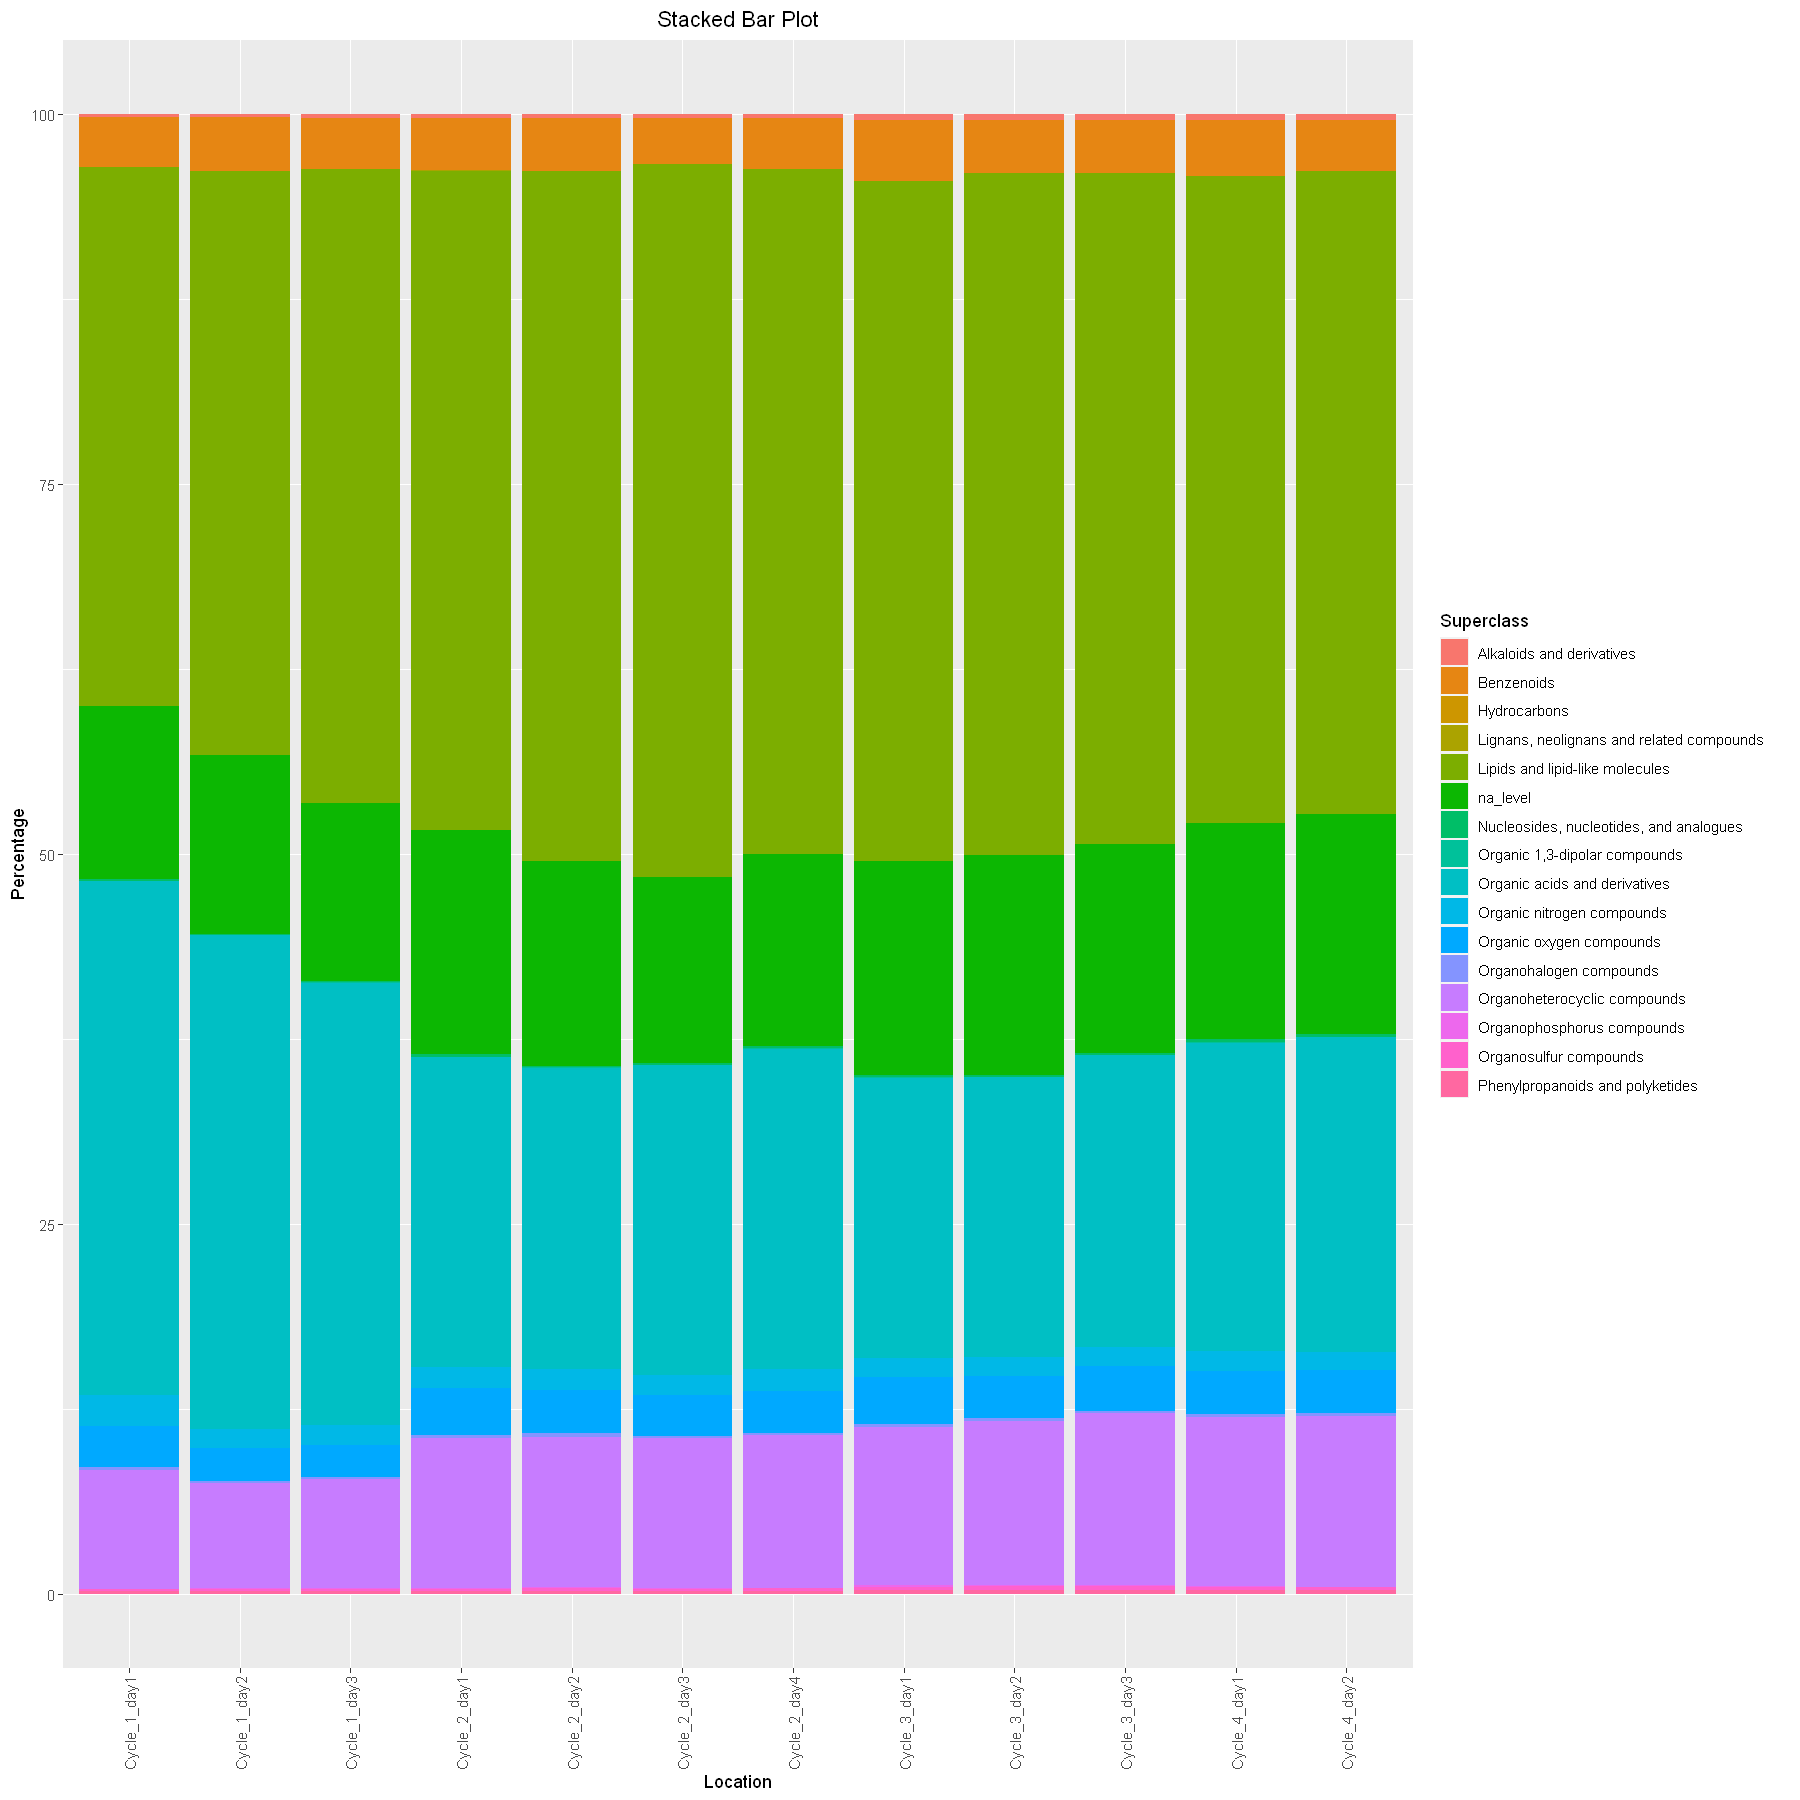

In [31]:
stackPlot

For the stacked plot, to change colors according to the order of groups as seen in the plot:

In [43]:
stack_names <- sort(unique(Overall_percent$Group_name)) # getting the group names and arranging them in alphabetical order
stack_names[which(stack_names == "na_level")] <- "NA values" #renaming the "na_level" as "NA values"
print(stack_names)

 [1] "Alkaloids and derivatives"                
 [2] "Benzenoids"                               
 [3] "Hydrocarbons"                             
 [4] "Lignans, neolignans and related compounds"
 [5] "Lipids and lipid-like molecules"          
 [6] "NA values"                                
 [7] "Nucleosides, nucleotides, and analogues"  
 [8] "Organic 1,3-dipolar compounds"            
 [9] "Organic acids and derivatives"            
[10] "Organic nitrogen compounds"               
[11] "Organic oxygen compounds"                 
[12] "Organohalogen compounds"                  
[13] "Organoheterocyclic compounds"             
[14] "Organophosphorus compounds"               
[15] "Organosulfur compounds"                   
[16] "Phenylpropanoids and polyketides"         


In [44]:
stack_colors <- c("#6A3D9A","#FDBF6F","#FFFF99",'#660066',
                  "#B2DF8A","gray","#D8FB08","#85c0ed",
                  "#1f78b4","#33A02C","#FB9A99","#CAB2D6",
                  "#E31A1C","#aa11aa","#B15928","#FF7F00")

Plot with the manual colors as mentioned:

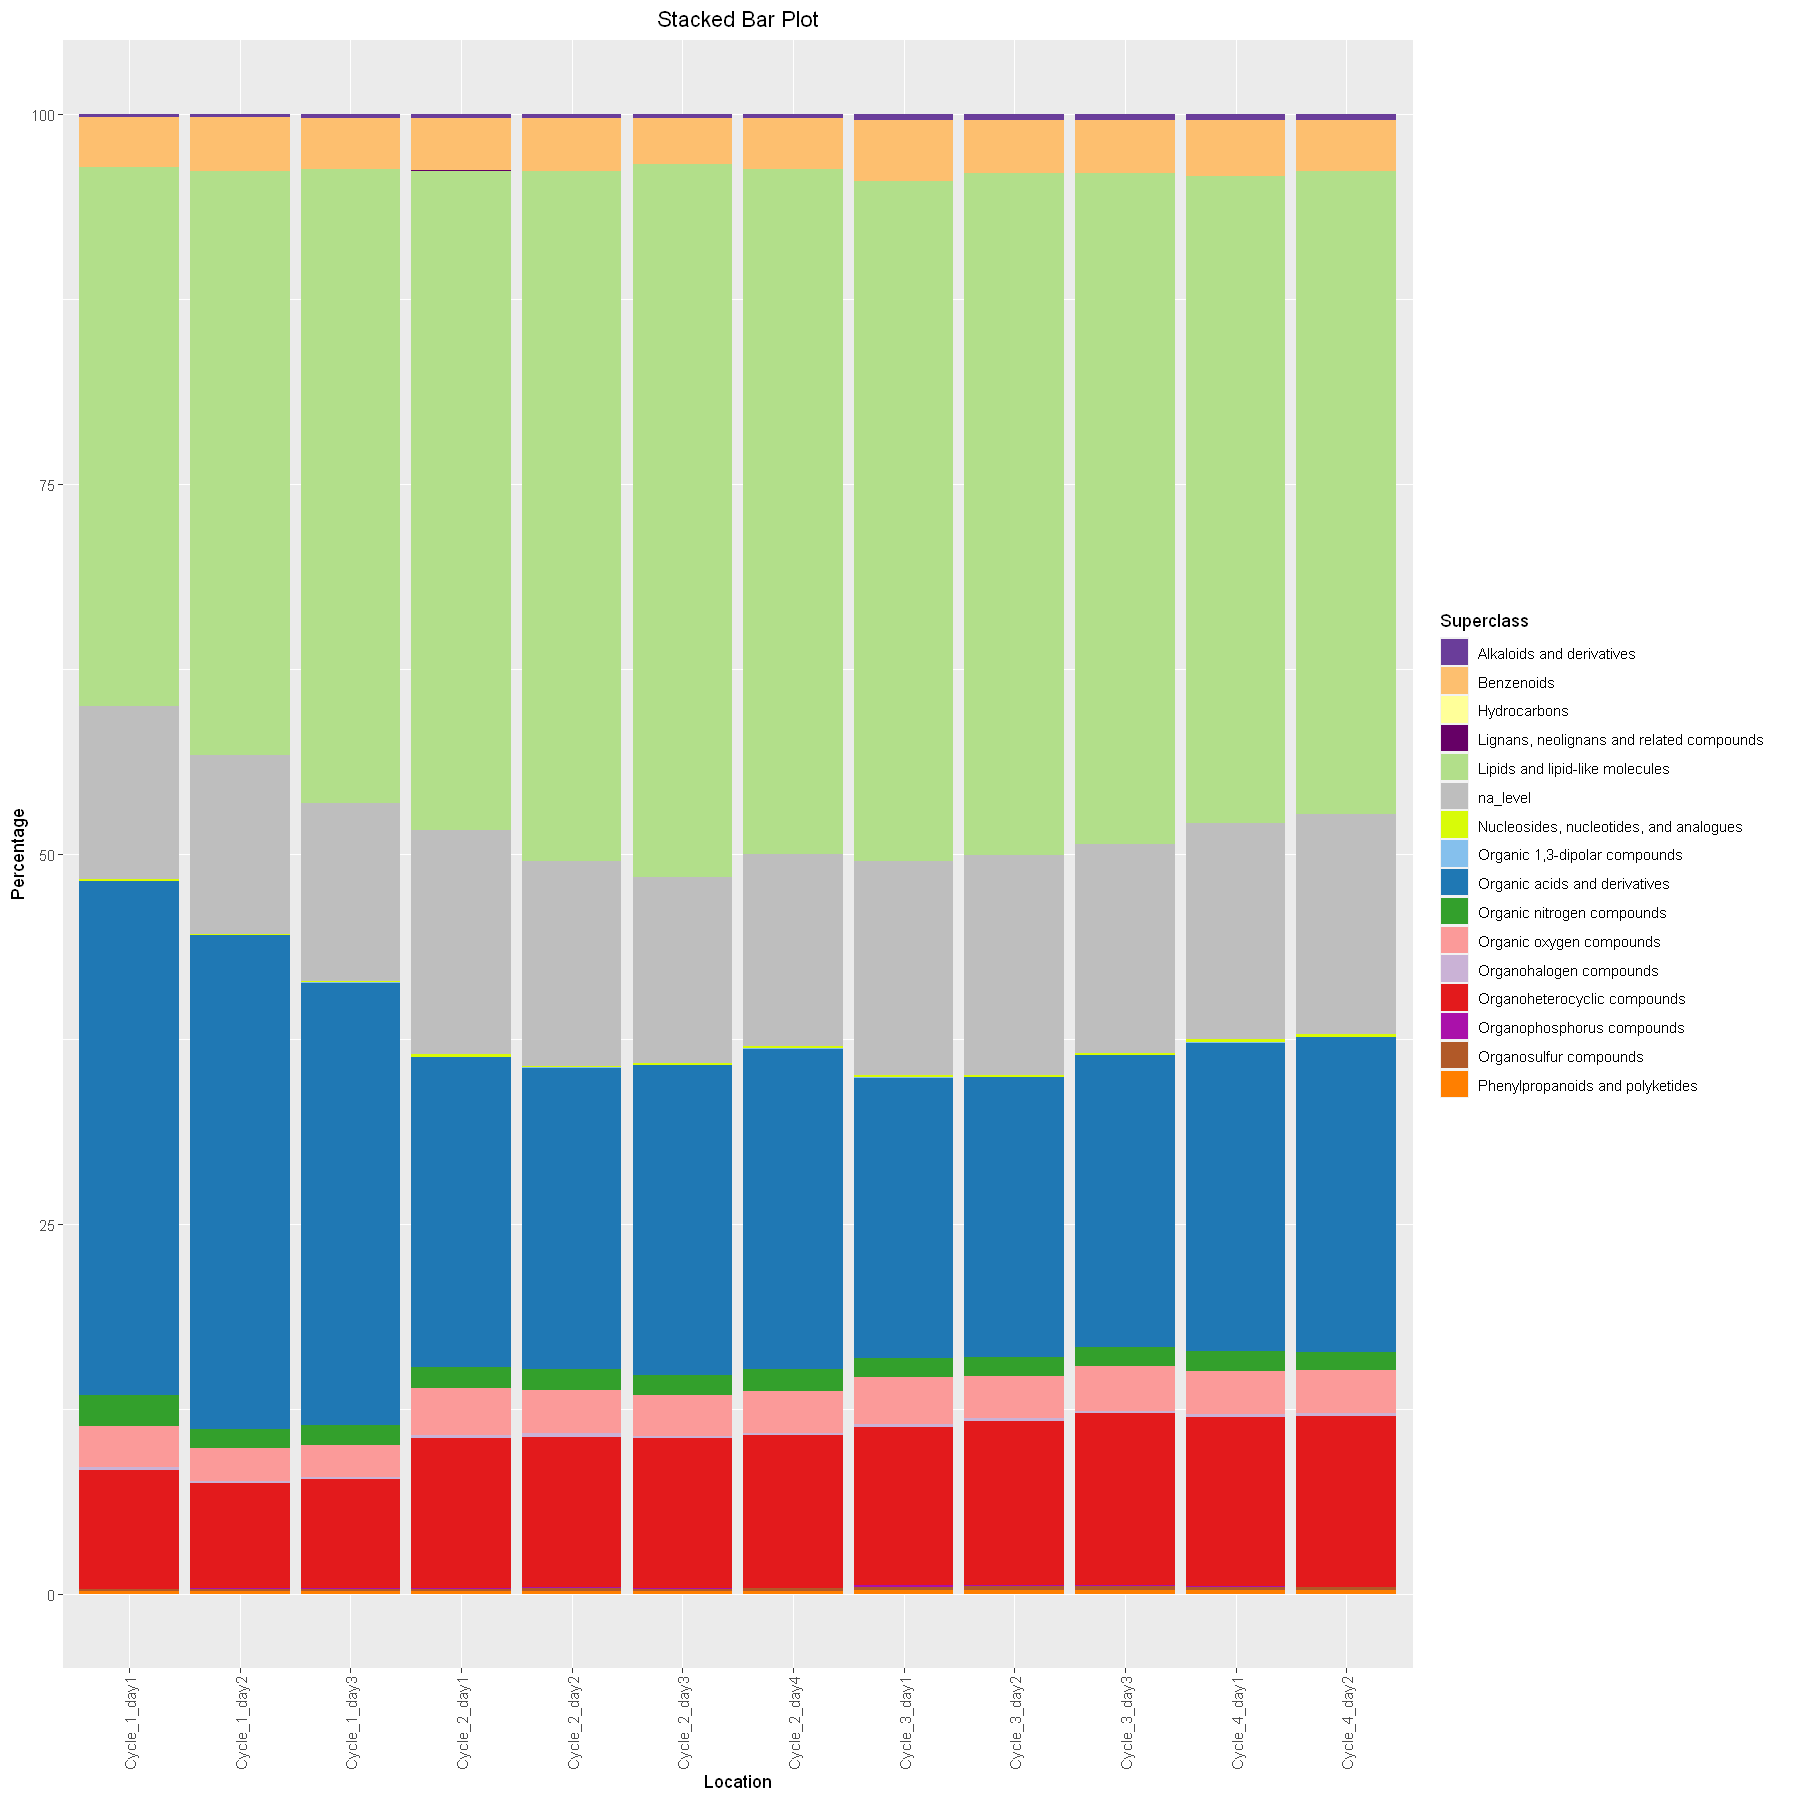

In [45]:
stackPlot <- stackPlot + scale_fill_manual(values = stack_colors)
stackPlot

In [ ]:
ggsave(paste0(Date,"_CCEMetabolites_Canopus_StackedPlot_withNA.svg"),stackPlot)

---
## ii. Stacked barplot without NA values:
Visualizing the same plot without NA values: <br>

In [61]:
NA_rows <- as.numeric(rownames(Overall_percent[Overall_percent$Group_name == 'na_level', ]))
Stacked_withoutNA <- Overall_percent[-(NA_rows),]

In [62]:
head(Stacked_withoutNA)

,Group_name,Group_sum,Percent,Location
,<chr>,<dbl>,<dbl>,<chr>
2,Alkaloids and derivatives,1.631485e+06,0.235,Cycle_1_day1
3,Benzenoids,2.329739e+07,3.360,Cycle_1_day1
4,Hydrocarbons,4.848506e+03,0.001,Cycle_1_day1
5,"Lignans, neolignans and related compounds",6.549354e+03,0.001,Cycle_1_day1
6,Lipids and lipid-like molecules,2.521962e+08,36.378,Cycle_1_day1
7,"Nucleosides, nucleotides, and analogues",6.848158e+05,0.099,Cycle_1_day1


In [63]:
unique(Stacked_withoutNA$Group_name)

[1] "Alkaloids and derivatives"                
 [2] "Benzenoids"                               
 [3] "Hydrocarbons"                             
 [4] "Lignans, neolignans and related compounds"
 [5] "Lipids and lipid-like molecules"          
 [6] "Nucleosides, nucleotides, and analogues"  
 [7] "Organic 1,3-dipolar compounds"            
 [8] "Organic acids and derivatives"            
 [9] "Organic nitrogen compounds"               
[10] "Organic oxygen compounds"                 
[11] "Organohalogen compounds"                  
[12] "Organoheterocyclic compounds"             
[13] "Organophosphorus compounds"               
[14] "Organosulfur compounds"                   
[15] "Phenylpropanoids and polyketides"

As you can see, NA levels are removed.

In [78]:
options(repr.plot.width=18, repr.plot.height=20,res=600) # the parameters: width, height & resolution can be changed

In [86]:
Stackplot2 <- ggplot(Stacked_withoutNA, aes(fill=Group_name, y=Percent, x=Location)) + 
  geom_bar(position="fill", stat="identity") + 
  xlab("Location") + 
  ylab("Percentage") + 
  scale_fill_manual(values=stack_colors[-6]) + # Removing the color 'gray' for the NA values
  theme(axis.text = element_text(size = 16),
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),  # setting the angle for the x label
        axis.title = element_text(size = 16, face= 'bold'),
        plot.title = element_text(size = 20, face= 'bold',hjust=0.5),
        plot.subtitle = element_text(size = 18, face= 'italic',hjust=0),
        legend.title = element_text(size = 18, face= 'bold'),
        legend.text = element_text(size = 16),
        panel.border=element_rect(fill=NA, color='black'),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"))

In [87]:
Stackplot2 <- Stackplot2 +
  ggtitle(label="Stacked Bar Plot") + #give the title name
  labs(fill = "Superclass") +   #give the title for the labels
  labs(subtitle = 'Without NA values') #provide a subtitle name

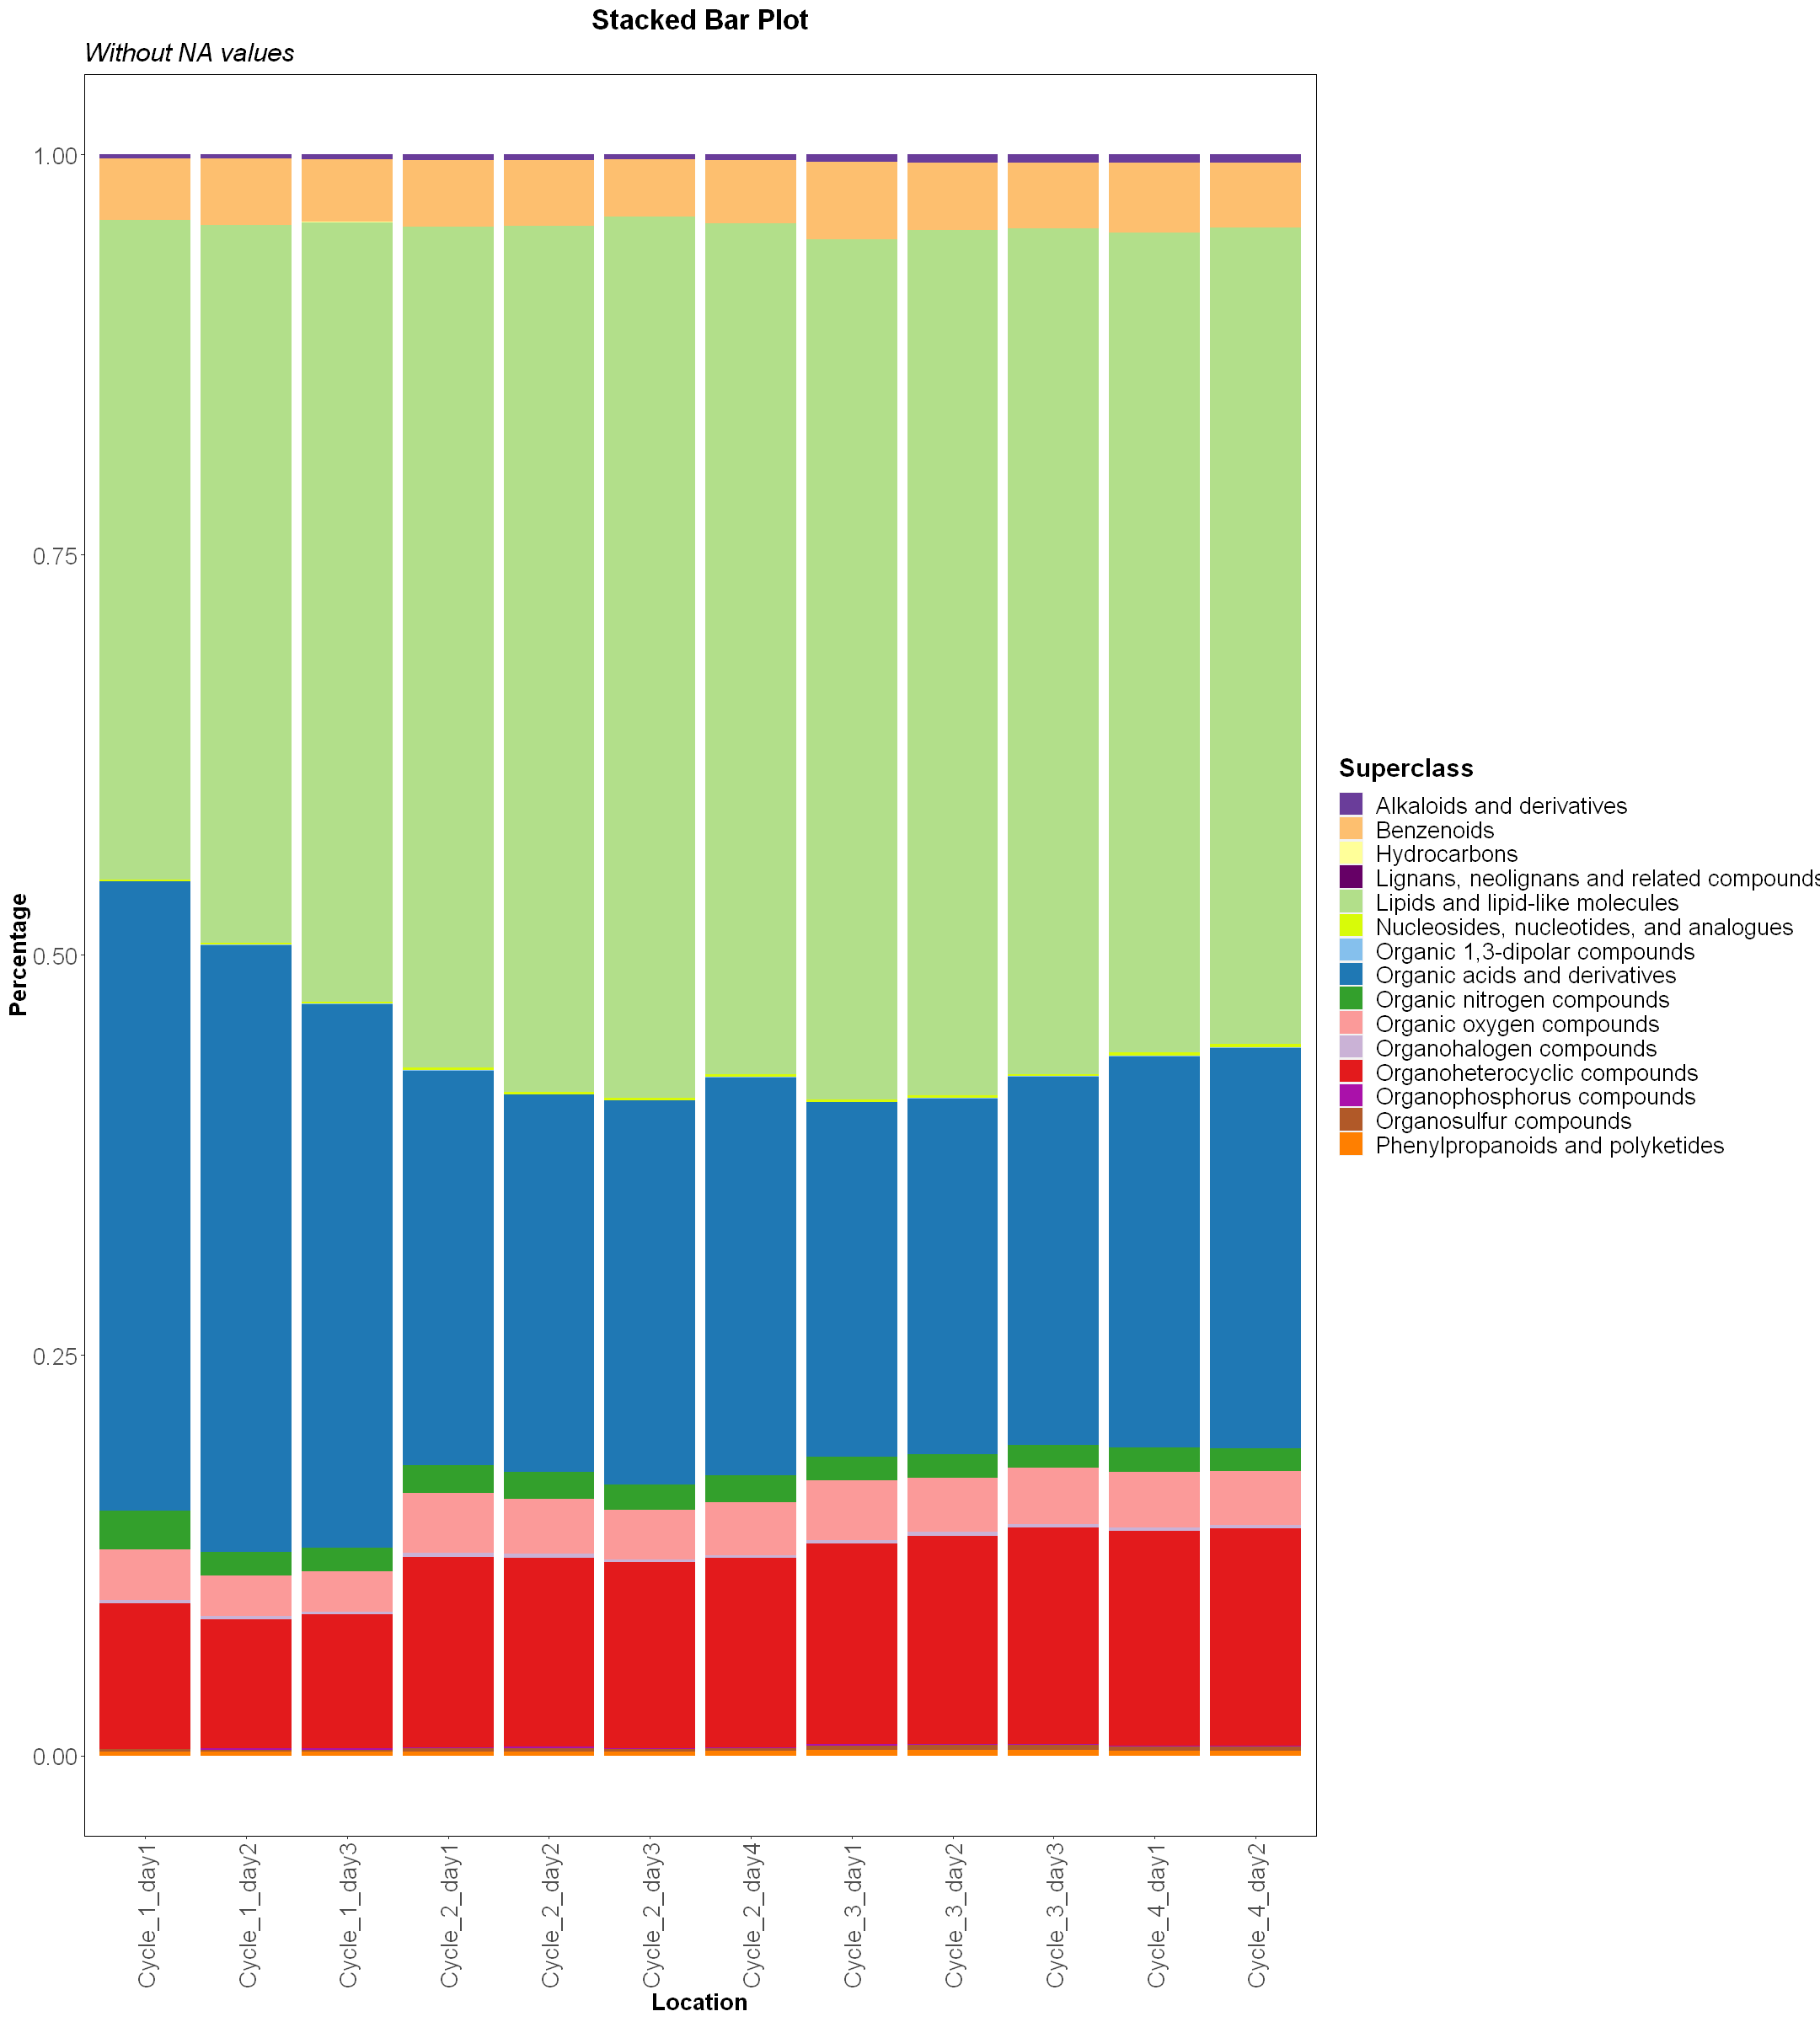

In [88]:
Stackplot2

In [ ]:
ggsave(paste0(Date,"_CCEMetabolites_Canopus_StackedPlot_withoutNA.svg"),Stackplot2)

---

<font size = 4>_<b>Repeat the whole notebook with normalised data to get the corresponding plots and csv files with group (Superclass) information.</b>_</font>